In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [2]:
#path = '/Users/Nidhi/Downloads/'
X = np.load('q3x.npy')  
X = X.reshape(-1,1)
N = X.shape[0]    
Y = np.load('q3y.npy')    
Y = Y.reshape(-1,1)
# To consider intercept term, we append a column vector with all entries=1.    
# Then the coefficient correpsonding to this column is an intercept term. 
X = np.concatenate((np.ones((N, 1)), X), axis=1)
W = np.array(np.zeros((X.shape[1],1)))

In [3]:
W = np.linalg.inv(np.dot(X.T, X)).dot(np.dot(X.T, Y))

Text(0, 0.5, 'Y')

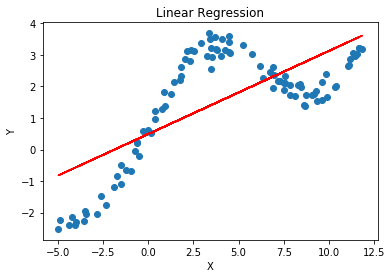

In [4]:
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X.dot(W), color = 'r')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')

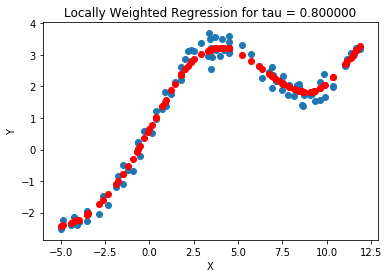

In [5]:
R = np.zeros((N,N))
y = np.zeros((Y.shape[0],1))
tau = 0.8
for i in range(N):
    W = np.array(np.zeros((X.shape[1],1)))
    for j in range(N):
        R[j][j] = np.exp((-(X[i,1] - X[j,1])**2)/(2*tau**2))
        W = np.linalg.inv(np.dot(X.T, R).dot(X)).dot(np.dot(X.T, R).dot(Y))
        y[i][0] = X[i,:].dot(W)
plt.figure()
plt.title('Locally Weighted Regression for tau = %f' %tau)
plt.scatter(X[:,1], Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X[:,1], y, color = 'r')

4


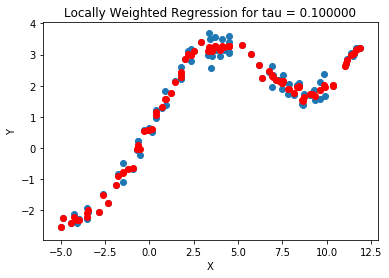

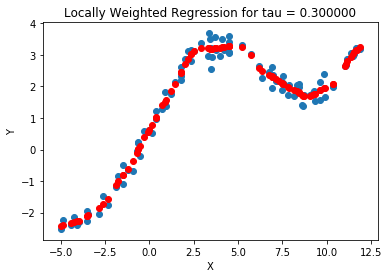

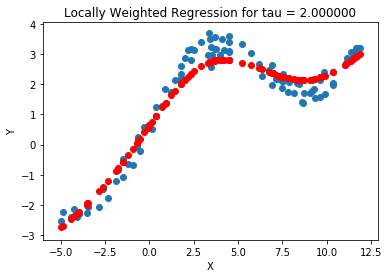

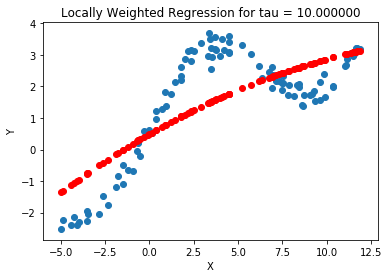

In [6]:
R = np.zeros((N,N))
y = np.zeros((Y.shape[0],1))
tau = [0.1, 0.3, 2, 10]
print(len(tau))
for k in range(len(tau)):
    for i in range(N):
        W = np.array(np.zeros((X.shape[1],1)))
        for j in range(N):
            R[j][j] = np.exp((-(X[i,1] - X[j,1])**2)/(2*tau[k]**2))
        W = np.linalg.inv(np.dot(X.T, R).dot(X)).dot(np.dot(X.T, R).dot(Y))
        y[i][0] = X[i,:].dot(W)
    plt.figure(k)
    plt.title('Locally Weighted Regression for tau = %f' %tau[k])
    plt.scatter(X[:,1], Y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(X[:,1], y, color = 'r')